In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import xlrd
import xlsxwriter
import random


###########1.读取数据部分##########
#载入数据并且打乱数据集
def load_data(TrainStartPo, TrainEndPo, TestStartPo, TestEndPo, PredStartPo, PredEndPo, FeatureNum, FilePath):         
    # 训练样本起始行数、结束行数，测试样本起始行数、结束行数，预测样本起始行数、结束行数，特征数，excel文件路径
    # 打开excel文件
    workbook = xlrd.open_workbook(str(FilePath))       # excel路径
    sheet = workbook.sheet_by_name('Sheet1')             # heet表
    train = [] # 训练集
    test = []
    pred = [] # 预测集
    # 载入训练样本集
    for load_train in range(TrainStartPo-1, TrainEndPo):
        train.append(sheet.row_values(load_train))
    # 载入测试样本集
    for load_test in range(TestStartPo-1, TestEndPo):
        test.append(sheet.row_values(load_test))
    # 载入预测样本集
    for load_pred in range(PredStartPo-1, PredEndPo):
        pred.append(sheet.row_values(load_pred))
    #变换样本集
    TrainSet = np.array(train)
    TestSet = np.array(test)
    PredSet = np.array(pred)        
   #分割特征与目标变量
    x1 , y1 = TrainSet[:,:FeatureNum] , TrainSet[:,-1]
    x2 , y2 = TestSet[:,:FeatureNum] , TestSet[:,-1]
    x3 , y3 = PredSet[:,:FeatureNum] , PredSet[:,-1]
    return x1 , y1 , x2 , y2, x3, y3


In [2]:
###########2.回归和显示部分##########
def regression_method(model, x_train, y_train, x_test, y_test, x_pred):
    model.fit(x_train, y_train)   # 使用训练集训练样本
    score = model.score(x_test, y_test)
    result = model.predict(x_test)
    pred = model.predict(x_pred)
    #######计算模型参数#######
    ResidualSquare = (result - y_test)**2     #计算残差平方
    MSE = np.mean(ResidualSquare)       #计算均方差
    RSS = sum(ResidualSquare)   #计算残差平方和
    # print(f'R^2={score}')
    # print(f'MSE={MSE}')
    # print(f'RSS={RSS}')
    ############绘图###########
    plt.figure(1, figsize=(16,8))
    # 子图1
    plt.subplot(121)
    plt.plot(np.arange(len(result)), y_test, 'go-', label='test value')
    plt.plot(np.arange(len(result)), result, 'ro-', label='predict value')
    plt.legend()        # 将样例显示出来
    # 子图2
    plt.subplot(122)
    plt.plot(np.arange(len(pred)), pred, 'bo-', label='predict value')
    ##################
    plt.suptitle(f'R^2 = {score}\nMSE = {MSE}\nRSS = {RSS}')
    plt.show()
    return pred

In [3]:
##########3.写入预测值########
def write_predict(x_pred, pred, OutPut):
    workbook = xlsxwriter.Workbook(str(OutPut))   # 保存地址
    worksheet = workbook.add_worksheet('Sheet1')
    for i in range(len(x_pred)):
        for j in range(len(x_pred[0])):
            worksheet.write(i , j, x_pred[i][j])  # 写入预测样本
        worksheet.write(i, j+1, pred[i])  # 写入预测值
    workbook.close()
    print('数据写入完成')

In [4]:
###########4.预设回归方法##########
####4.1决策树回归####
from sklearn import tree
model_DecisionTreeRegressor = tree.DecisionTreeRegressor()
####4.2线性回归####
from sklearn import linear_model
model_LinearRegression = linear_model.LinearRegression()
####4.3SVM回归####
from sklearn import svm
model_SVR = svm.SVR(kernel = 'sigmoid')
####4.4KNN回归####
from sklearn import neighbors
model_KNeighborsRegressor = neighbors.KNeighborsRegressor()
####4.5随机森林回归####
from sklearn import ensemble
model_RandomForestRegressor = ensemble.RandomForestRegressor(n_estimators=20)#这里使用20个决策树
####4.6Adaboost回归####
from sklearn import ensemble
model_AdaBoostRegressor = ensemble.AdaBoostRegressor(n_estimators=50)#这里使用50个决策树
####4.7GBRT回归####
from sklearn import ensemble
model_GradientBoostingRegressor = ensemble.GradientBoostingRegressor(n_estimators=100)#这里使用100个决策树
####4.8Bagging回归####
from sklearn.ensemble import BaggingRegressor
model_BaggingRegressor = BaggingRegressor()
####4.9ExtraTree极端随机树回归####
from sklearn.tree import ExtraTreeRegressor
model_ExtraTreeRegressor = ExtraTreeRegressor()


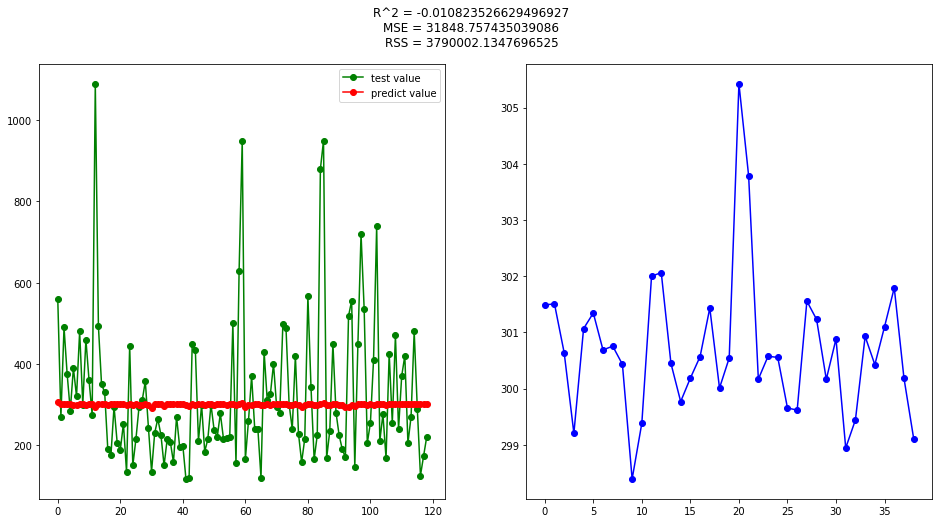

NameError: name 'output' is not defined

In [6]:
########5.设置参数与执行部分#############
#设置数据参数部分
method = model_SVR  # 选择方法
trains = [0, 235]  # 训练集起始结束行
tests = [236, 354]  # 测试集起始结束行
preds = [355, 393]  # 预测集起始结束行
features = 9  # 特征数
path = r'C:/Users/86180/Desktop/data.xlsx'  # 样本数据集读取路径
#output = r'C:/Users/86180/Desktop/predict1.xlsx'  # 预测数据集保存路径

#########执行预测并输出############
x_train, y_train, x_test, y_test, x_pred, y_pred = load_data(trains[0], trains[1], tests[0], tests[1], preds[0], preds[1], features, path)   #行数以excel里为准
pred = regression_method(method, x_train, y_train, x_test, y_test, x_pred)        #括号内填上方法，并获取预测值
write_predict(x_pred, pred, output)


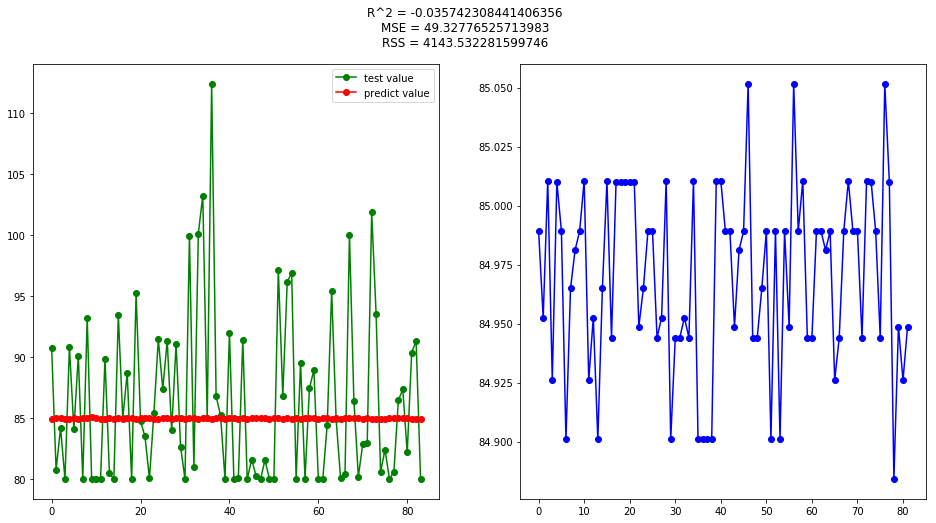

数据写入完成


In [12]:
########5.设置参数与执行部分#############
#设置数据参数部分
method = model_SVR  # 选择方法
trains = [2, 252]  # 训练集起始结束行
tests = [253, 336]  # 测试集起始结束行
preds = [337, 418]  # 预测集起始结束行
features = 9  # 特征数
path = r'C:/Users/86180/Desktop/dataset1.xlsx'  # 样本数据集读取路径
output = r'C:/Users/86180/Desktop/predict1.xlsx'  # 预测数据集保存路径

#########执行预测并输出############
x_train, y_train, x_test, y_test, x_pred, y_pred = load_data(trains[0], trains[1], tests[0], tests[1], preds[0], preds[1], features, path)   #行数以excel里为准
pred = regression_method(method, x_train, y_train, x_test, y_test, x_pred)        #括号内填上方法，并获取预测值
write_predict(x_pred, pred, output)


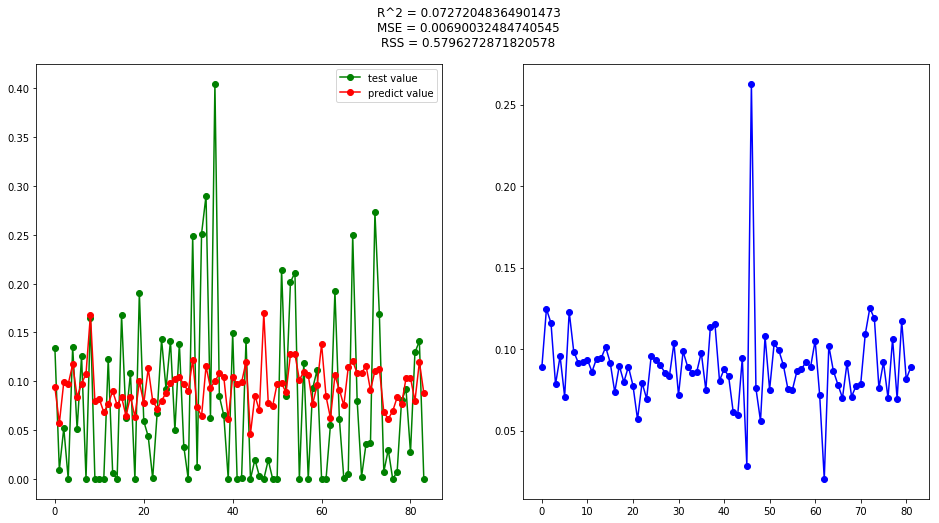

数据写入完成


In [11]:
########5.设置参数与执行部分#############
#设置数据参数部分
method = model_LinearRegression  # 选择方法
trains = [2, 252]  # 训练集起始结束行
tests = [253, 336]  # 测试集起始结束行
preds = [337, 418]  # 预测集起始结束行
features = 13  # 特征数
path = r'C:/Users/86180/Desktop/dataset2.xlsx'  # 样本数据集读取路径
#output = r'C:/Users/86180/Desktop/predict1.xlsx'  # 预测数据集保存路径

#########执行预测并输出############
x_train, y_train, x_test, y_test, x_pred, y_pred = load_data(trains[0], trains[1], tests[0], tests[1], preds[0], preds[1], features, path)   #行数以excel里为准
pred = regression_method(method, x_train, y_train, x_test, y_test, x_pred)        #括号内填上方法，并获取预测值
write_predict(x_pred, pred, output)
